1. What is unsupervised learning in the context of machine learning?
Unsupervised learning is a type of machine learning where the algorithm learns patterns from unlabeled data without explicit guidance. It aims to find hidden structures or relationships within the data.

2. How does K-Means clustering algorithm work?
K-Means iteratively partitions data into K clusters. It assigns each data point to the cluster with the nearest mean (centroid) and then updates the centroids to be the mean of all points assigned to that cluster until convergence.

3. Explain the concept of a dendrogram in hierarchical clustering.
A dendrogram is a tree-like diagram that illustrates the arrangement of clusters produced by hierarchical clustering. It shows the sequence of merges or divisions and the distance at which they occurred.

4. What is the main difference between K-Means and Hierarchical Clustering?
K-Means requires a pre-defined number of clusters (K) and assigns points to fixed clusters. Hierarchical clustering builds a tree of clusters, not requiring a pre-defined K, and can be agglomerative (bottom-up) or divisive (top-down).

5. What are the advantages of DBSCAN over K-Means?
DBSCAN can find arbitrarily shaped clusters, identify noise points, and doesn't require pre-defining the number of clusters. K-Means is limited to spherical clusters and assigns all points to a cluster.

6. When would you use Silhouette Score in clustering?
Silhouette Score is used to evaluate the quality of clustering when ground truth labels are unknown. It measures how similar an object is to its own cluster compared to other clusters, indicating cohesion and separation.

7. What are the limitations of Hierarchical Clustering?
Hierarchical clustering can be computationally expensive for large datasets (O(n
3
 ) or O(n
2
 )). It is also sensitive to noise and outliers, and once a merge or split is made, it cannot be undone.

8. Why is feature scaling important in clustering algorithms like K-Means?
Feature scaling is crucial because clustering algorithms often rely on distance metrics. Without scaling, features with larger ranges can disproportionately influence distance calculations, leading to biased clustering results.

9. How does DBSCAN identify noise points?
DBSCAN identifies noise points as those that are neither core points nor border points. They are points that do not have enough neighbors within a specified radius (epsilon) to be considered part of a cluster.

10. Define inertia in the context of K-Means.
Inertia, also known as within-cluster sum of squares (WCSS), measures the sum of squared distances between each point and its assigned cluster centroid. Lower inertia generally indicates better clustering.

11. What is the elbow method in K-Means clustering?
The elbow method is a heuristic used to determine the optimal number of clusters (K) in K-Means. It involves plotting inertia against different K values and choosing the K where the decrease in inertia starts to slow down, forming an "elbow."

12. Describe the concept of "density" in DBSCAN.
In DBSCAN, density refers to the number of data points within a specified radius (ϵ) around a given point. Core points have a minimum number of points (MinPts) within their ϵ-neighborhood, indicating high density.

13. Can hierarchical clustering be used on categorical data?
Yes, hierarchical clustering can be used on categorical data, but it requires defining a suitable distance metric for categorical variables, such as Hamming distance or Gower distance, before applying the clustering algorithm.

14. What does a negative Silhouette Score indicate?
A negative Silhouette Score indicates that data points might have been assigned to the wrong cluster. It means a point is, on average, closer to points in other clusters than to points in its own cluster.

15. Explain the term "linkage criteria" in hierarchical clustering.
Linkage criteria define the distance between two clusters in hierarchical clustering. Common criteria include single linkage (minimum distance), complete linkage (maximum distance), average linkage (average distance), and Ward's method.

16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?
K-Means assumes clusters are spherical and of similar size and density. It tends to split larger clusters or merge smaller ones when density varies, as its objective function minimizes squared distances to centroids.

17. What are the core parameters in DBSCAN, and how do they influence clustering?
The core parameters in DBSCAN are eps (epsilon), the maximum distance between two samples for one to be considered as in the neighborhood of the other, and min_samples (MinPts), the number of samples in a neighborhood for a point to be considered as a core point. These influence cluster shape and noise detection.

18. How does K-Means++ improve upon standard K-Means initialization?
K-Means++ improves initialization by selecting initial cluster centroids that are far apart from each other. This helps to avoid poor initializations that can lead to slow convergence or suboptimal clustering results.

19. What is agglomerative clustering?
Agglomerative clustering is a "bottom-up" hierarchical clustering approach. It starts with each data point as its own cluster and iteratively merges the closest pairs of clusters until all points are in a single cluster or a stopping criterion is met.

20. What makes Silhouette Score a better metric than just inertia for model evaluation?
Inertia decreases with more clusters and doesn't indicate cluster separation. Silhouette Score considers both cohesion within clusters and separation between them, providing a more balanced evaluation of clustering quality

# PRACTICLE QUESTIONS

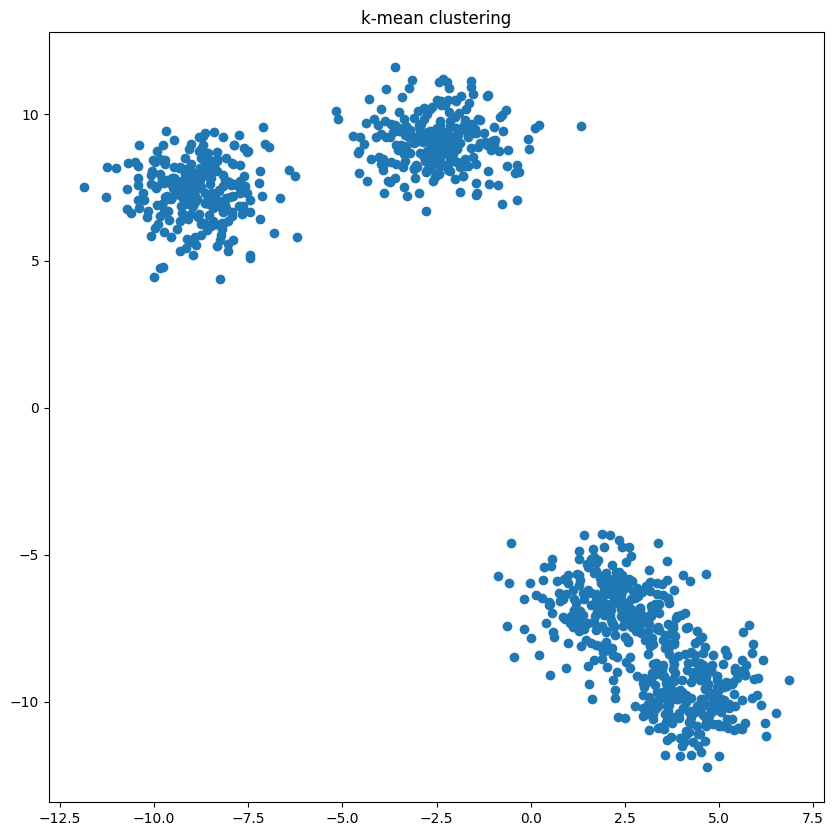

0.7972578600797052


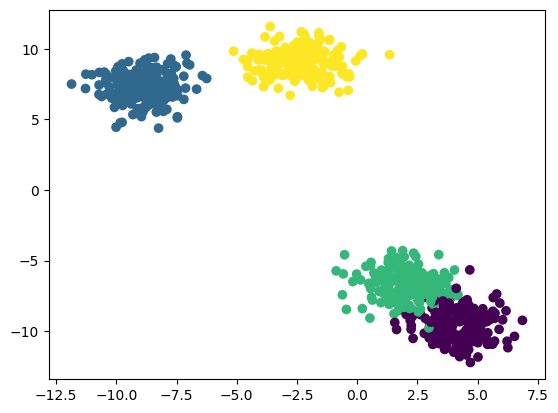

In [ ]:
#21. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a
#scatter plot

from sklearn.datasets import make_blobs
x,y = make_blobs(n_samples=1000, centers= 4, n_features=3,random_state=42 )

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
x_scalled= scaler.fit_transform(x_train)


import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.title("k-mean clustering")
plt.scatter(x[:,0],x[:,1])
plt.show()

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4,init="k-means++",random_state=42)
kmeans.fit(x_scalled)
y_labels= kmeans.predict(x_scalled)

#final visualization

plt.scatter(x_train[:,0],x_train[:,1],c=y_labels)


from sklearn.metrics import silhouette_score
print(silhouette_score(x_scalled,kmeans.labels_))




In [ ]:
#22. Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10
# predicted labels

from sklearn.datasets import load_iris
import pandas as pd
data = load_iris()
df = pd.DataFrame(data.data,columns=data.feature_names)

x= df.iloc[:, :-1]
df["target"]=data.target
y= df["target"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scalled= scaler.fit_transform(x_train)


from sklearn.cluster import AgglomerativeClustering
ob1= AgglomerativeClustering(n_clusters=3,linkage="ward",metric="euclidean")
ob1.fit(x_scalled)

label = ob1.labels_
from sklearn.metrics import silhouette_score
print(silhouette_score(x_scalled,ob1.labels_))


0.4672440825938679


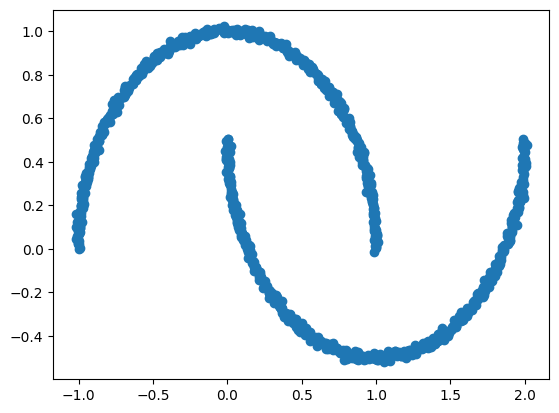

0.40020240494371284


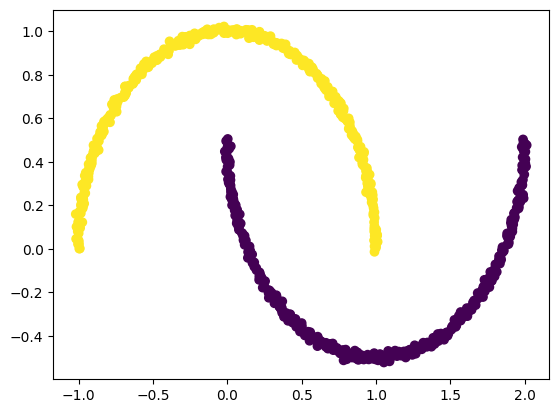

In [ ]:
#23.  Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot?


from sklearn.datasets import make_moons
x,y = make_moons(n_samples=1000,noise = 0.01)


import matplotlib.pyplot as plt

plt.scatter(x[:,0],x[:,1])
plt.show()

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scalled= scaler.fit_transform(x_train)


from sklearn.cluster import DBSCAN
dbscan= DBSCAN(eps=0.5)
dbscan.fit(x_scalled)

dbscan.labels_

from sklearn.metrics import silhouette_score
print(silhouette_score(x_scalled,dbscan.labels_))



plt.scatter(x_train[:,0],x_train[:,1] , c= dbscan.labels_)
plt.show()



In [ ]:
#24. Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each
# cluster

from sklearn.datasets import load_wine
import pandas as pd
data = load_wine()
df = pd.DataFrame(data.data,columns= data.feature_names)


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scalled= scaler.fit_transform(x_train)


from sklearn.cluster import KMeans

kmeans= KMeans(n_clusters = 3,random_state =42)

kmeans.fit(x_scalled)
model = kmeans.labels_

from sklearn.metrics import silhouette_score
print(silhouette_score(x_scalled,dbscan.labels_))

0.40020240494371284


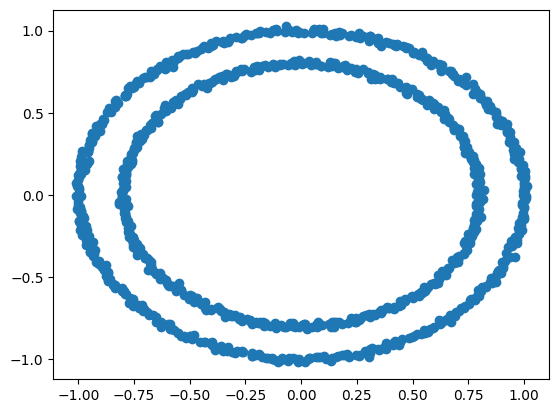

-0.11536742281511427


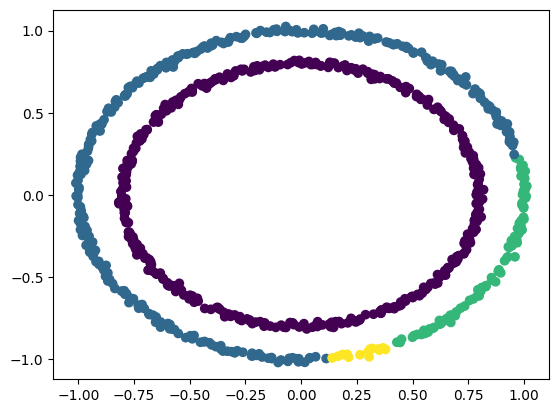

In [ ]:
 #25. Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result


from sklearn.datasets import make_circles

x,y = make_circles(n_samples=1000,noise = 0.01)


import matplotlib.pyplot as plt

plt.scatter(x[:,0],x[:,1])
plt.show()

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scalled= scaler.fit_transform(x_train)


from sklearn.cluster import DBSCAN
dbscan= DBSCAN(eps=0.1)
dbscan.fit(x_scalled)

dbscan.labels_

from sklearn.metrics import silhouette_score
print(silhouette_score(x_scalled,dbscan.labels_))



plt.scatter(x_train[:,0],x_train[:,1] , c= dbscan.labels_)
plt.show()




In [ ]:
#26. Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster
# centroids

from sklearn.datasets import load_breast_cancer
import pandas as pd


data = load_breast_cancer()
df = pd.DataFrame(data.data,columns=data.feature_names)

x= df.iloc[:, :-1]
df["target"]=data.target
y= df["target"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scalled = scaler.fit_transform(x_train)


from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,random_state=42)
kmeans.fit(x_scalled)


from sklearn.metrics import silhouette_score
print(silhouette_score(x_scalled,kmeans.labels_))


0.3852441284522867


In [ ]:
#27. Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with
# DBSCAN


from sklearn.datasets import make_blobs
x,y = make_blobs(n_samples=1000, centers= 4, n_features=3,random_state=42 )

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
x_scalled= scaler.fit_transform(x_train)

from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
y_lab= dbscan.fit_predict(x_scalled)

from sklearn.metrics import silhouette_score
print(silhouette_score(x_scalled,y_lab))




0.7831823635669651


0.4309121386036284


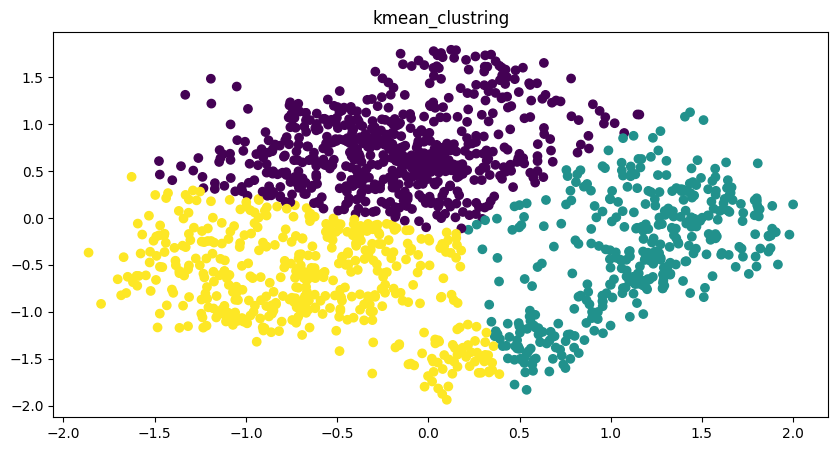

In [ ]:
#28. Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means?

from sklearn.datasets import load_digits
import pandas as pd


data = load_digits()
df = pd.DataFrame(data.data,columns=data.feature_names)

x= df.iloc[:, :-1]
df["target"]=data.target
y= df["target"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scalled = scaler.fit_transform(x_train)


from sklearn.decomposition import PCA

dim = PCA(n_components=2)
pca_scaled = dim.fit_transform(x_scalled)


from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,random_state=42)
y_lab = kmeans.fit_predict(pca_scaled)

from sklearn.metrics import silhouette_score
print(silhouette_score(pca_scaled,y_lab))


#visualisation

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title("kmean_clustring")
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=y_lab)
plt.show()

In [ ]:

#29. Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart


from sklearn.datasets import make_blobs
x,y = make_blobs(n_samples=1000, centers= 4, n_features=3,random_state=42 )

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
x_scalled= scaler.fit_transform(x_train)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

s_score = []
for i in range(2,6):
  kmeans = KMeans(n_clusters= i,random_state=42)
  y_lab= kmeans.fit_predict(x_scalled)

  score = silhouette_score(x_scalled,y_lab)
  s_score.append(score)
  y_lab= kmeans.fit_predict(x_scalled)

  score = silhouette_score(x_scalled,y_lab)
  s_score.append(score)




print(s_score)





[np.float64(0.5977466796018678), np.float64(0.5977466796018678), np.float64(0.7831823635669651), np.float64(0.7831823635669651), np.float64(0.7972578600797052), np.float64(0.7972578600797052), np.float64(0.6734229365631854), np.float64(0.6734229365631854)]


0.47774555469755836


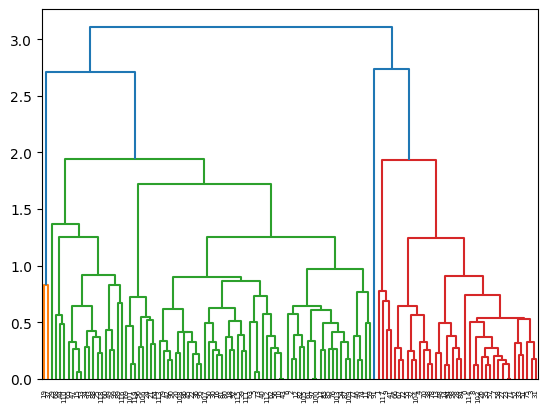

In [ ]:
#30.Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage
from sklearn.datasets import load_iris
import pandas as pd
data = load_iris()
df = pd.DataFrame(data.data,columns=data.feature_names)

x= df.iloc[:, :-1]
df["target"]=data.target
y= df["target"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scalled= scaler.fit_transform(x_train)


from sklearn.cluster import AgglomerativeClustering
ob1= AgglomerativeClustering(n_clusters=3,linkage="average",metric="euclidean")
ob1.fit(x_scalled)

label = ob1.labels_
from sklearn.metrics import silhouette_score
print(silhouette_score(x_scalled,ob1.labels_))



#dendogram visualisation

import scipy.cluster.hierarchy as sc
import matplotlib.pyplot as plt
sc.dendrogram(sc.linkage(x_scalled,method="average"))
plt.show()



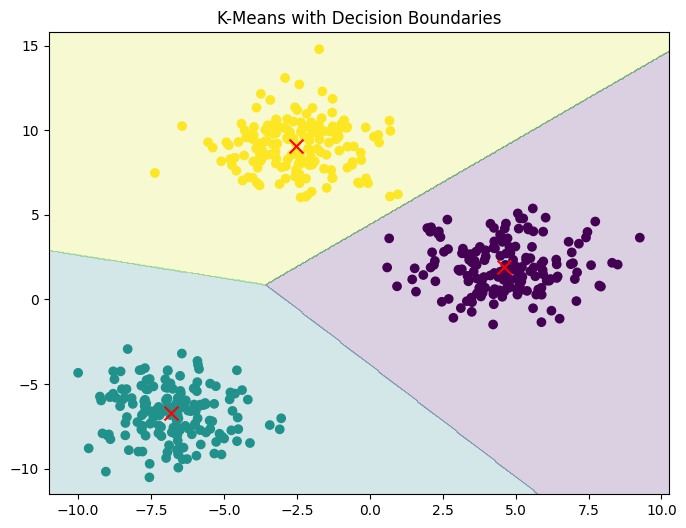

In [ ]:
#31.  Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with
#decision boundaries


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(n_samples=500, centers=3, cluster_std=1.5, random_state=42)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.predict(X)

# Plotting with decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.2)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100)
plt.title("K-Means with Decision Boundaries")
plt.show()


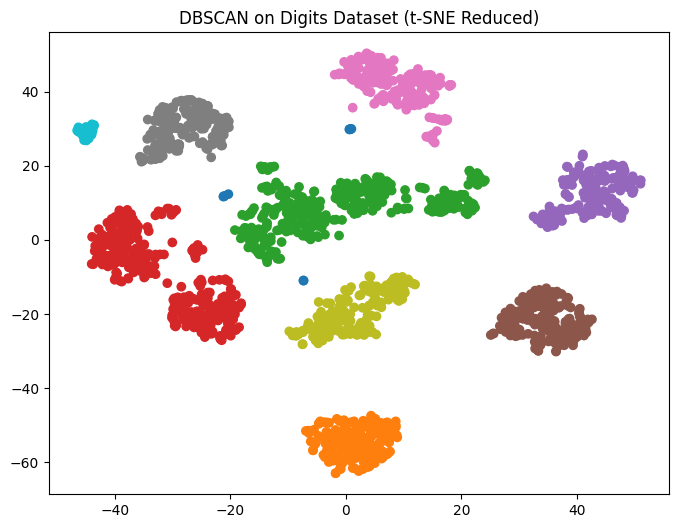

In [ ]:
#32. Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results

from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

digits = load_digits()
X = digits.data

X_tsne = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X)
dbscan = DBSCAN(eps=5, min_samples=5)
labels = dbscan.fit_predict(X_tsne)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10')
plt.title("DBSCAN on Digits Dataset (t-SNE Reduced)")
plt.show()


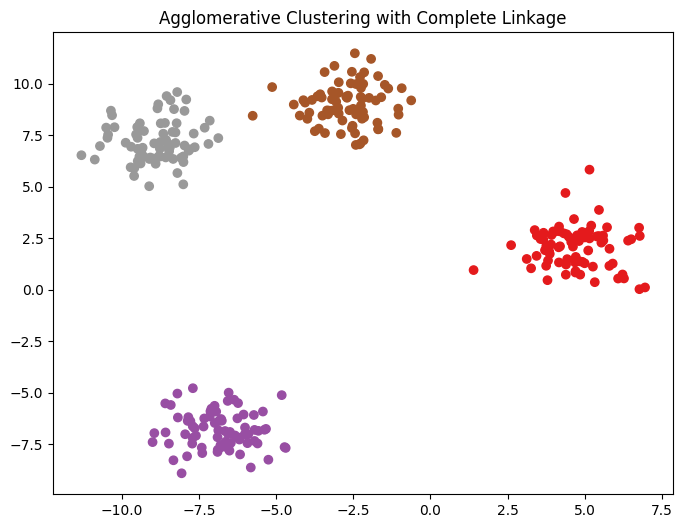

In [ ]:
#33.  Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot
#the result

from sklearn.cluster import AgglomerativeClustering

X, y = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)
agg = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels = agg.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Set1')
plt.title("Agglomerative Clustering with Complete Linkage")
plt.show()



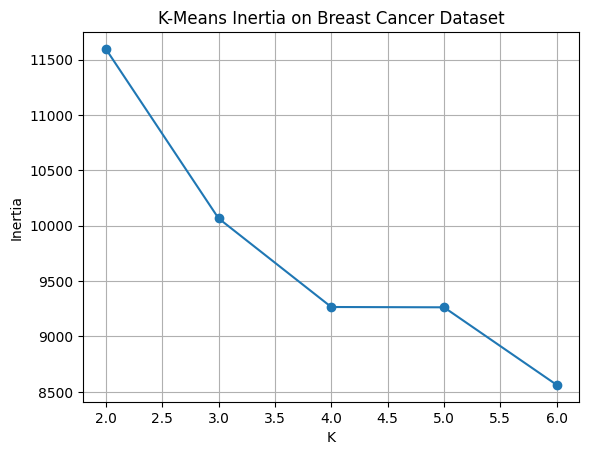

In [ ]:
#34.  Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a
#line plot

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

data = load_breast_cancer()
X = StandardScaler().fit_transform(data.data)

inertias = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

plt.plot(range(2, 7), inertias, marker='o')
plt.xlabel("K")
plt.ylabel("Inertia")
plt.title("K-Means Inertia on Breast Cancer Dataset")
plt.grid(True)
plt.show()


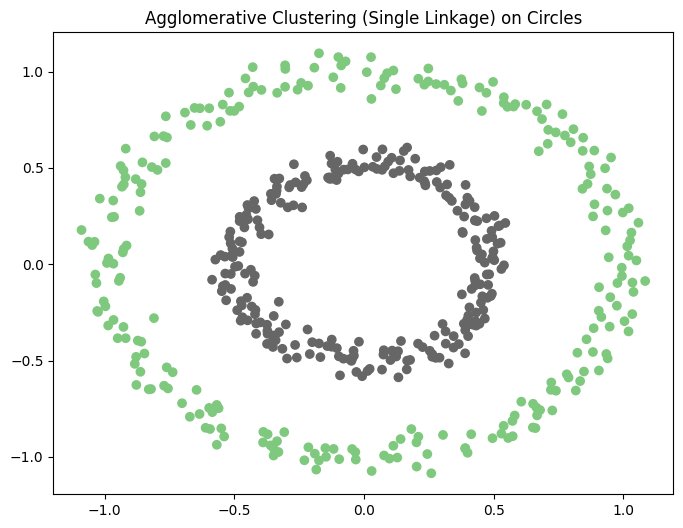

In [ ]:
#35. Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with
#single linkage
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=500, factor=0.5, noise=0.05)
agg = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agg.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Accent')
plt.title("Agglomerative Clustering (Single Linkage) on Circles")
plt.show()


In [ ]:
#36. Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding
#noise

from sklearn.datasets import load_wine

data = load_wine()
X = StandardScaler().fit_transform(data.data)

db = DBSCAN(eps=1.5, min_samples=5)
labels = db.fit_predict(X)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print(f"Number of clusters (excluding noise): {n_clusters}")



Number of clusters (excluding noise): 0


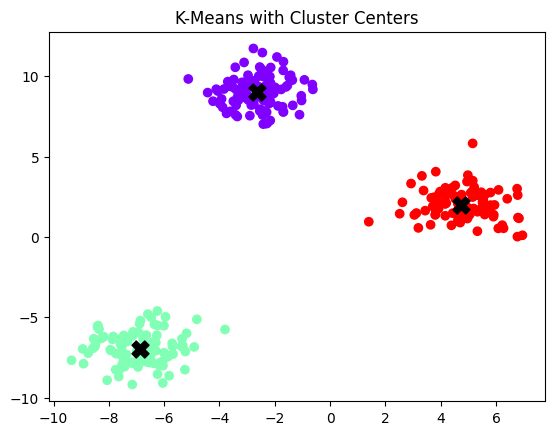

In [ ]:
#37. Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the
#data points

X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)
km = KMeans(n_clusters=3, random_state=42)
labels = km.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='black', s=150, marker='X')
plt.title("K-Means with Cluster Centers")
plt.show()



In [ ]:
#38. Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise

from sklearn.datasets import load_iris

X = load_iris().data
X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.6, min_samples=5)
labels = db.fit_predict(X)

n_noise = list(labels).count(-1)
print(f"Number of noise samples: {n_noise}")


Number of noise samples: 26


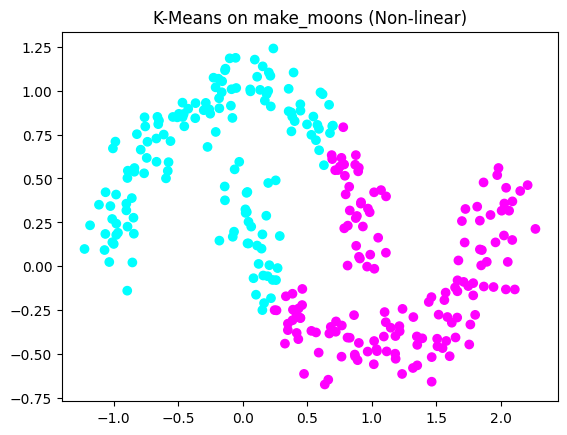

In [ ]:
#39. Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the
#clustering result

from sklearn.datasets import make_moons

X, y = make_moons(n_samples=300, noise=0.1, random_state=42)
km = KMeans(n_clusters=2, random_state=42)
labels = km.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='cool')
plt.title("K-Means on make_moons (Non-linear)")
plt.show()



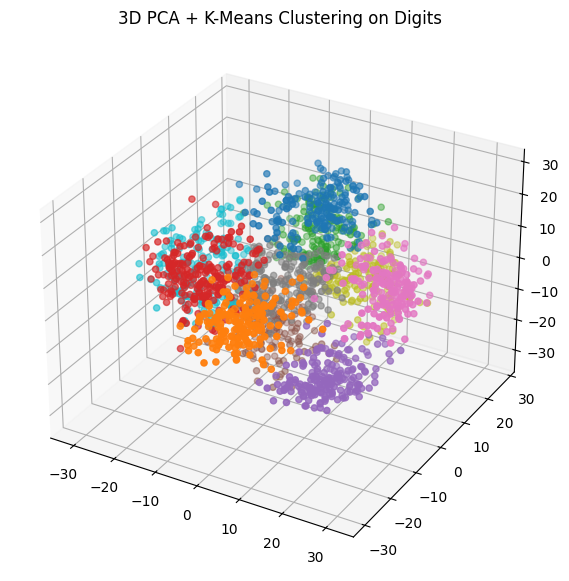

In [ ]:
#40.  Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D
#scatter plot

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

digits = load_digits()
X = digits.data
X_pca = PCA(n_components=3).fit_transform(X)
km = KMeans(n_clusters=10, random_state=42)
labels = km.fit_predict(X_pca)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='tab10')
ax.set_title("3D PCA + K-Means Clustering on Digits")
plt.show()


In [7]:
#41. Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the
# clustering

from sklearn.datasets import make_blobs

x,y = make_blobs(n_samples = 1000, n_features=2,centers = 5, random_state=42)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
x_scalled= scaler.fit_transform(x_train)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5,random_state=42)
y_labeled=kmeans.fit_predict(x_scalled)


from sklearn.metrics import silhouette_score

print(silhouette_score(x_scalled,y_labeled))



0.6752844822532063


0.5334766397398797


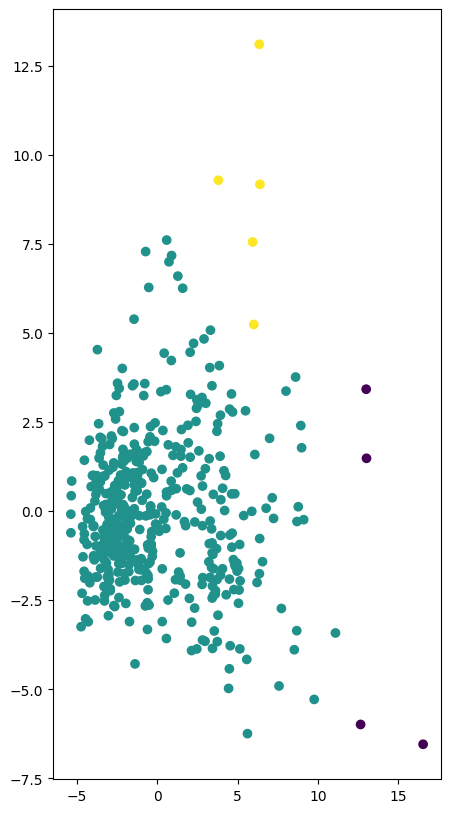

In [11]:
#42. Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering.
# Visualize in 2D

from sklearn.datasets import load_breast_cancer

import pandas as pd
data = load_breast_cancer()
df = pd.DataFrame(data.data,columns=data.feature_names)

x= df.iloc[:, :-1]
df["target"]=data.target
y= df["target"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scalled= scaler.fit_transform(x_train)


from sklearn.decomposition import PCA
pca= PCA(n_components=2)
x_pca=pca.fit_transform(x_scalled)

from sklearn.cluster import AgglomerativeClustering
ob1 = AgglomerativeClustering(n_clusters= 3,linkage="average")
y_lebel = ob1.fit_predict(x_pca)

from sklearn.metrics import silhouette_score
print(silhouette_score(x_pca,y_lebel))


#visualisation

import matplotlib.pyplot as plt

plt.figure(figsize=(5,10))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_lebel)
plt.show()


-0.3023291524867915


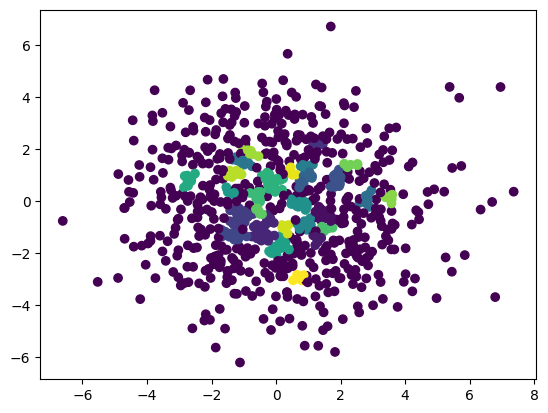

0.3054749944862413


In [13]:
#43. Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN
# side-by-side


#DBSCAN
from sklearn.datasets import make_circles

x,y = make_circles(n_samples=1000,noise = 2)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scalled= scaler.fit_transform(x_train)


from sklearn.cluster import DBSCAN
dbscan= DBSCAN(eps=0.1)
dbscan.fit(x_scalled)

dbscan.labels_

from sklearn.metrics import silhouette_score
print(silhouette_score(x_scalled,dbscan.labels_))


import matplotlib.pyplot as plt
plt.scatter(x_train[:,0],x_train[:,1] , c= dbscan.labels_)
plt.show()


#kmean

from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5,random_state=42)
y_labeled=kmeans.fit_predict(x_scalled)


from sklearn.metrics import silhouette_score

print(silhouette_score(x_scalled,y_labeled))










In [15]:
#44. Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering


from sklearn.datasets import load_iris
import pandas as pd
data = load_iris()
df = pd.DataFrame(data.data,columns=data.feature_names)

x= df.iloc[:, :-1]
df["target"]=data.target
y= df["target"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scalled= scaler.fit_transform(x_train)


from sklearn.cluster import KMeans
ob1= KMeans(n_clusters=3)
ob1.fit_predict(x_scalled)

y_label = ob1.labels_



0.46462334639314695


0.6733167275421149


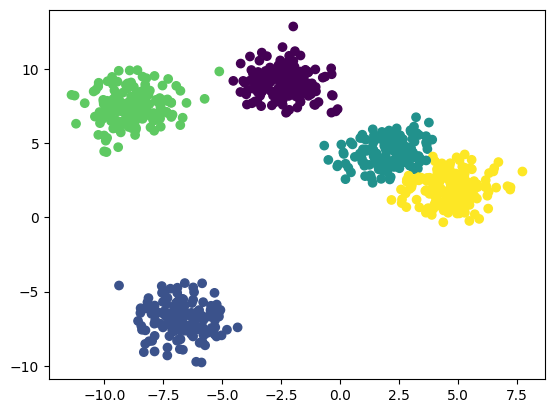

In [18]:
#45.  Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage.
# Visualize clusters

from sklearn.datasets import make_blobs

x,y = make_blobs(n_samples = 1000, n_features=2,centers = 5, random_state=42)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
x_scalled= scaler.fit_transform(x_train)


from sklearn.cluster import AgglomerativeClustering
ob1 = AgglomerativeClustering(n_clusters = 5,linkage = "average")
ob1.fit_predict(x_scalled)
y_label = ob1.labels_


from sklearn.metrics import silhouette_score
print(silhouette_score(x_scalled,y_label))


import matplotlib.pyplot as plt
plt.scatter(x_train[:,0],x_train[:,1] , c= y_label)
plt.show()


/tmp/ipython-input-19-4195540885.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_subset['Cluster'] = clusters


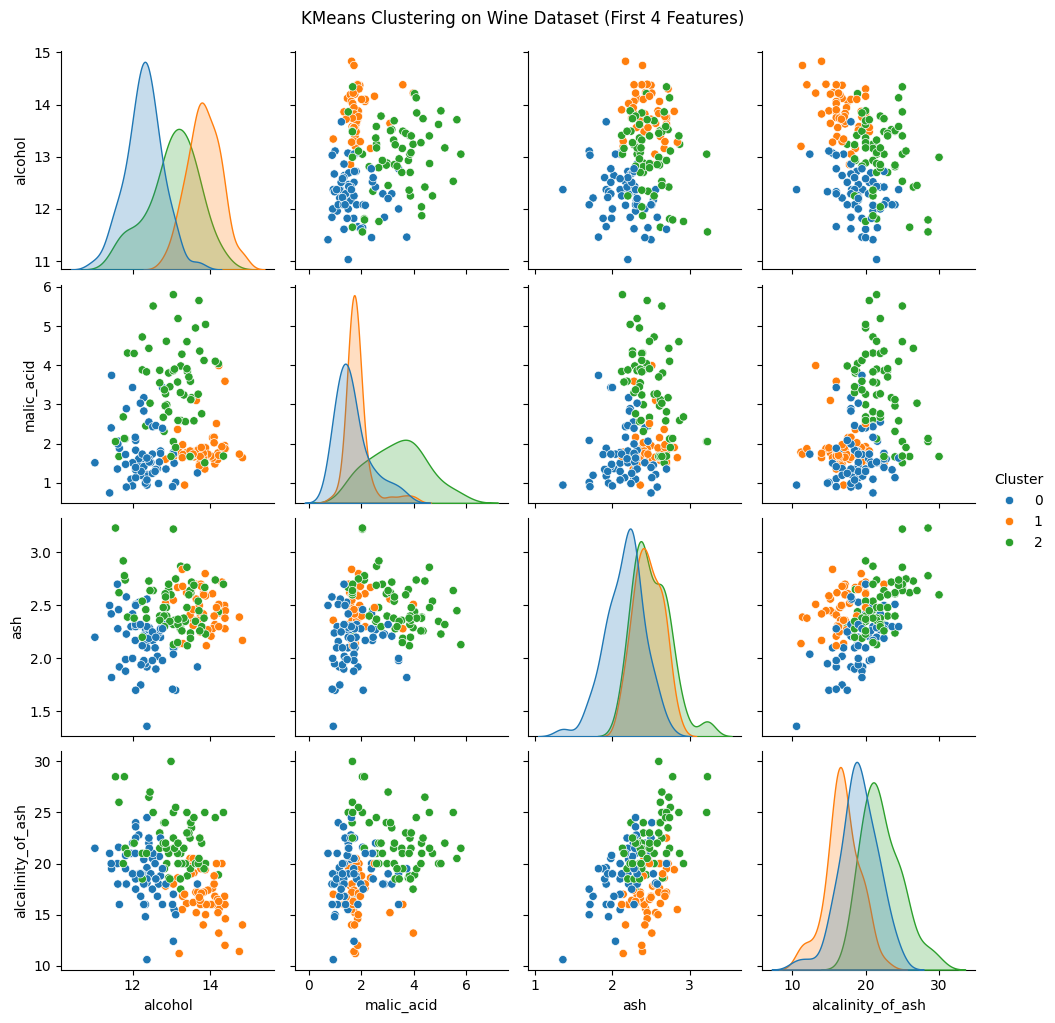

In [19]:
#46. Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4
#features

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)


X_subset = X.iloc[:, :4]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_subset)


kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


X_subset['Cluster'] = clusters


sns.pairplot(X_subset, hue='Cluster', palette='tab10', diag_kind='kde')
plt.suptitle('KMeans Clustering on Wine Dataset (First 4 Features)', y=1.02)
plt.show()


In [23]:
#47. Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the
#count
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np


X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)


X_scaled = StandardScaler().fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Count clusters and noise
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

# Print results
print(f"Number of clusters found: {n_clusters}")




Number of clusters found: 3


0.3963890491752731


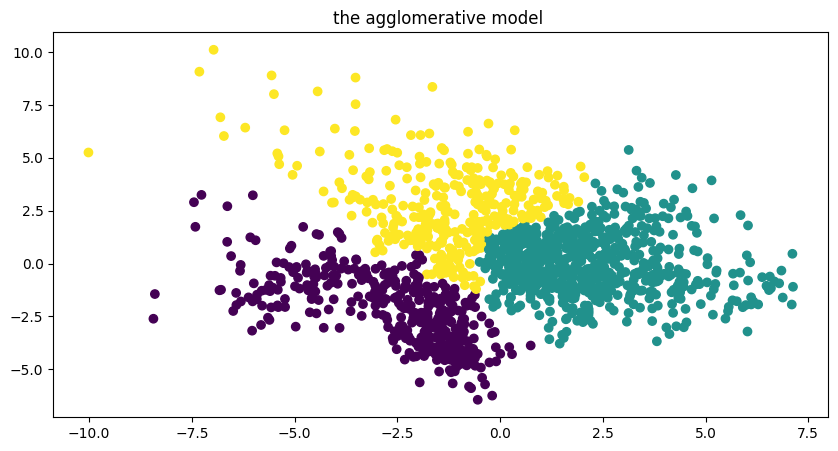

In [22]:
#48. Load the Digits dataset, reduce dimensions using  pca, then apply Agglomerative Clustering and plot the
# clusters.


from sklearn.datasets import load_digits


import pandas as pd
data = load_digits()
df = pd.DataFrame(data.data,columns=data.feature_names)

x= df.iloc[:, :-1]
df["target"]=data.target
y= df["target"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scalled= scaler.fit_transform(x_train)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scalled)



from sklearn.cluster import AgglomerativeClustering

ob1 = AgglomerativeClustering(n_clusters=3,linkage="ward")
ob1.fit_predict(x_pca)
y_label = ob1.labels_


from sklearn.metrics import silhouette_score
print(silhouette_score(x_pca,y_label))


import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.title("the agglomerative model ")
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_label)
plt.show()



